<a href="https://colab.research.google.com/github/gitflai/Workshop-DDS/blob/main/Dados_de_Custos_Medicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Adaptado de https://github.com/gitflai/Workshop-DDS

# **Dados de Custos Médicos** | *Medical Cost Data*

Os dados são provenientes da plataforma Kaggle e pode ser acessado nesse [link](https://www.kaggle.com/mirichoi0218/insurance). 

As variáveis desse dataset são: 
- *age*: idade da pessoa.
- *sex*: gênero da pessoa.
- *bmi*: índice de massa corporal da pessoa.
- *children*: número de dependentes da pessoa.
- *smoker*: se a pessoa é fumante ou não
- *region*: região em que a pessoa mora.
- *charges*: custos médicos individuais cobrados pelo plano de saúde

O objetivo primário nesse dataset é fazer a previsão da variável custos. Fazer essa previsão é fundamental e de interesse de qualquer instituição que venda planos de saúde. Fazer essa precificação corretamente é fundamental para adquirir uma vantagem competitiva no mercado. Uma boa precificação garante que a instituição está operando dentro dos limites orçamentários e que cada pessoa pague o mais próximo do que seria uma parcela justa, de acordo com suas variáveis de entrada. 

E os objetivos desse case são:
- Ilustrar os recursos do PyCaret 
- Criar uma solução rápida e com boa performance. 
- Explorar os contextos de regressão e classificação. 
- Mostrar que é possível colocar uma nova ótica em conjuntos clássicos da literatura. 
- Procedimento end-to-end de Machine Learning: dos dados ao deploy. 

Um possíve objetivo secundário seria fazer um modelo para previsão da variável *fumante* para detectar possíveis fraudadores dessa variável. Como é uma variável que impacta significativamente no preço dos planos de saúde, algumas pessoas podem se ver tentadas a responderem que não são fumantes, quando na verdade são. Isso levaria a precificações incorretas e injustas. Para resolver isso, um modelo pode ser empregado e indicar a probabilidade de um indivídio estar comentendo fraude. Os indivíduos com maior probabilidade de fraude podem seguir para uma investigação mais detalhada do caso, de modo a evitar perdas maiores. 

O outline desse case:

- Análise Exploratória de Dados (Rápida).
- Machine Learning com PyCaret | Objetivo primário: case de regressão.
- Machine Learning com PyCaret | Objetivo secundário: case de classificação.
- Considerações Finais.

## **Análise Exploratória de Dados (Rápida)**

## Carregando o PyCaret
PyCaret: https://medium.com/ensina-ai/pycaret-a-biblioteca-de-aprendizagem-de-m%C3%A1quinas-para-quem-tem-prazo-1c5b09667763

In [1]:
# Importando com Pandas
import pandas as pd
dados = pd.read_csv('insurance.csv')
dados.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

### **EDA automática através do SweetViz**

https://medium.com/data-hackers/4-boas-maneiras-de-iniciar-a-explora%C3%A7%C3%A3o-de-dados-7801dcc61c4

#pip3 install sweetviz

In [2]:
import sweetviz 

In [3]:
eda = sweetviz.analyze(dados)
eda.show_html(filepath = 'Relatorio_Univariado.html') 


Report Relatorio_Univariado.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [4]:
eda2 = sweetviz.compare_intra(dados, dados['smoker'] == 'yes', ['Fumante', 'Não Fumante'])
eda2.show_html(filepath = 'Relatorio_Bivariado.html') 

/home/vagner/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/home/vagner/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/home/vagner/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with differe


Report Relatorio_Bivariado.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [6]:
import IPython
#IPython.display.HTML(filename='/content/Relatorio_Univariado.html')
#IPython.display.HTML(filename='/content/Relatorio_Bivariado.html')

### **Acrescentando com um gráfico bastante pertinente:**

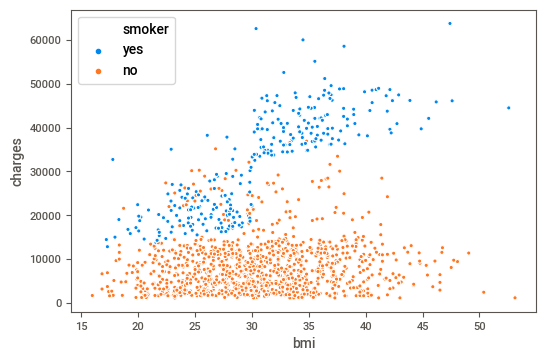

In [7]:
import seaborn as sns
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados);

## **Machine Learning com PyCaret  |  Objetivo primário: obter um bom modelo para previsão dos custos para melhor precificação de planos de saúde** 

In [9]:
from pycaret.regression import *

In [10]:
# configurações de pré-processamento e validação nos modelos utilizados adiante. 

regressao = setup(data = dados, 
                  target = 'charges', 
                  normalize = True,
                  combine_rare_levels = True, 
                  remove_outliers = True,
                  session_id = 1)

### Criando um modelo incial básico, porém robusto, utilizando Random Forest.

In [12]:
# para verificar o que cada parâmetro faz:
?setup

In [13]:
models()

Name  \
ID                                            
lr                        Linear Regression   
lasso                      Lasso Regression   
ridge                      Ridge Regression   
en                              Elastic Net   
lar                  Least Angle Regression   
llar           Lasso Least Angle Regression   
omp             Orthogonal Matching Pursuit   
br                           Bayesian Ridge   
ard       Automatic Relevance Determination   
par            Passive Aggressive Regressor   
ransac              Random Sample Consensus   
tr                       TheilSen Regressor   
huber                       Huber Regressor   
kr                             Kernel Ridge   
svm               Support Vector Regression   
knn                   K Neighbors Regressor   
dt                  Decision Tree Regressor   
rf                  Random Forest Regressor   
et                    Extra Trees Regressor   
ada                      AdaBoost Regressor   
gbr             Gradient Boosting Regressor   
mlp                           MLP Regressor   
xgboost           Extreme Gradient Boosting   
lightgbm    Light Gradient Boosting Machine   
catboost                 CatBoost Regressor   

                                                  Reference  Turbo  
ID                                                                  
lr              sklearn.linear_model._base.LinearRegression   True  
lasso        sklearn.linear_model._coordinate_descent.Lasso   True  
ridge                     sklearn.linear_model._ridge.Ridge   True  
en        sklearn.linear_model._coordinate_descent.Elast...   True  
lar                  sklearn.linear_model._least_angle.Lars   True  
llar            sklearn.linear_model._least_angle.LassoLars   True  
omp       sklearn.linear_model._omp.OrthogonalMatchingPu...   True  
br                sklearn.linear_model._bayes.BayesianRidge   True  
ard               sklearn.linear_model._bayes.ARDRegression  False  
par       sklearn.linear_model._passive_aggressive.Passi...   True  
ransac         sklearn.linear_model._ransac.RANSACRegressor  False  
tr        sklearn.linear_model._theil_sen.TheilSenRegressor  False  
huber            sklearn.linear_model._huber.HuberRegressor   True  
kr                         sklearn.kernel_ridge.KernelRidge  False  
svm                                sklearn.svm._classes.SVR  False  
knn       sklearn.neighbors._regression.KNeighborsRegressor   True  
dt              sklearn.tree._classes.DecisionTreeRegressor   True  
rf           sklearn.ensemble._forest.RandomForestRegressor   True  
et             sklearn.ensemble._forest.ExtraTreesRegressor   True  
ada       sklearn.ensemble._weight_boosting.AdaBoostRegr...   True  
gbr          sklearn.ensemble._gb.GradientBoostingRegressor   True  
mlp            pycaret.internal.tunable.TunableMLPRegressor  False  
xgboost                        xgboost.sklearn.XGBRegressor   True  
lightgbm                     lightgbm.sklearn.LGBMRegressor   True  
catboost                    catboost.core.CatBoostRegressor   True

In [11]:
floresta = create_model('rf')

In [14]:
# tunando a floresta através do método RandomSearch, isto é, explorando 20 alternativas diferentes de hiperparâmetros

floresta_tunada = tune_model(floresta, optimize = 'MAPE', n_iter = 20)

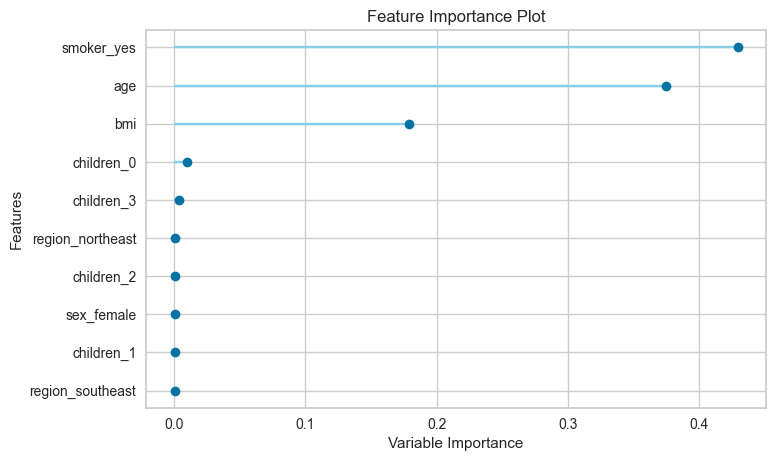

In [15]:
# importancia das variáveis de acordo com a floresta tunada

plot_model(floresta_tunada, plot = 'feature')


---

### Avaliando os modelos disponíveis e selecionando os 3 melhores, em suas configurações padrão:

In [16]:
modelos = compare_models(sort = 'RMSLE', n_select = 3)

In [17]:
modelos_tunados = [tune_model(i, optimize = 'RMSLE') for i in modelos]


In [18]:
# combinando os 5 modelos tunados em um único preditor combinado
modelo_combinado = blend_models(modelos_tunados)

In [19]:
# Verificando a performance nos dados de validacao
pred = predict_model(modelo_combinado)
 

In [20]:
# Aplicando o modelo final em todos os dados disponíveis
modelo_final = finalize_model(modelo_combinado)

In [21]:
# Salvando o modelo
save_model(modelo_final, 'meu-modelo-para-os-custos')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                                                     ('par',
                                                      PassiveAggressiveRegressor(C=0.297,
                                                                                 average=False,
                                                                  

In [24]:
# Deploy Básico

def CustoSeguro(age, sex, bmi, children, smoker, region):
    dados0 = {'age': [age], 'sex': [sex], 'bmi': [bmi], 'children': [children], 'smoker': [smoker], 'region': [region]}
    dados = pd.DataFrame(dados0)

    modelo = load_model('meu-modelo-para-os-custos')

    pred = float(predict_model(modelo, data = dados)['Label'].round(2))
    valor = round(1.8*pred, 2)
    
    print(' ')
    print('Idade: {}'.format(age))
    print('Sexo: {}'.format(sex))
    print('IMC: {}'.format(bmi))
    print('Crianças: {}'.format(children))
    print('Fumante: {}'.format(smoker))
    print('Região: {}'.format(region))
    print(' ')
    print('Custo do Seguro: ${}'.format(pred))
    print('Valor de Venda: ${}'.format(valor))

CustoSeguro(age = 48, sex = 'male', bmi = 25, children = 1, smoker =  'no', region = 'southwest')

Transformation Pipeline and Model Successfully Loaded
 
Idade: 48
Sexo: male
IMC: 25
Crianças: 1
Fumante: no
Região: southwest
 
Custo do Seguro: $8648.42
Valor de Venda: $15567.16


---

---

---

## **Machine Learning com PyCaret  |  Objetivo secundário: será que existem pessoas fraudando a variável *smoker*? Isto é, por conta das diferenças nos custos, será que há pessoas que digam que não são fumantes, quando na verdade são, na intenção de diminuir o custo do plano de saúde?**

### Pensando nesse caso, vamos desenvolver um modelo para prever se clientes do plano de saúde são potenciais fraudadores. De forma que seja possível enviar a informação para um departamento para uma investigação mais minuciosa sobre o potencial fraudador. 

### Para isso, criaremos um modelo de classificação para prever a variável *smoker*, com o intuito de obter um modelo com a melhor taxa de acerto possível na predição. Os indivíduos que são classificados pelo modelo como fumantes, mas que sua observação conste que não seja, são os potenciais fraudadores. Um modelo que retorne probabilidades é desejável nesse caso, pois pode ser utilizado como escala no potencial de fraude. 

In [25]:
from pycaret.classification import *

In [26]:
# configurações de pré-processamento e validação nos modelos utilizados adiante. 

classificacao = setup(data = dados, 
                  target = 'smoker', 
                  normalize = True,
                  combine_rare_levels = True, 
                  remove_outliers = True,
                  session_id = 1)

In [27]:
modelos = compare_models(n_select = 7)

In [28]:
modelos_tunados = [tune_model(i) for i in modelos]


In [29]:
melhor_modelo = blend_models(modelos_tunados, method = 'soft', choose_better = True) 

# os melhores modelos soltam probabilidades, então podemos fazer a combinação 'soft'.
# o parametro 'choose_better' permite que a função retorne apenas o melhor modelo individual,
# caso a resultado combinado não tenha performance superior a todos os modelos individuais.

In [30]:
melhor_modelo

In [31]:
pred = predict_model(melhor_modelo)

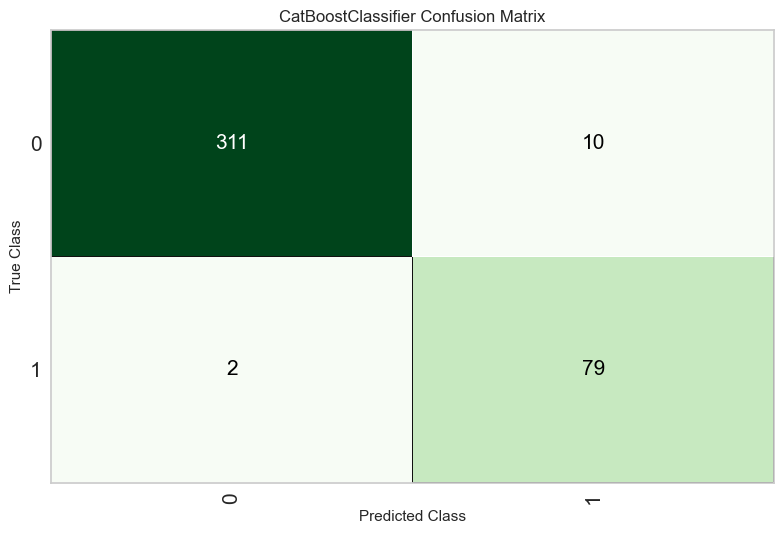

In [32]:
plot_model(melhor_modelo, plot = 'confusion_matrix')

In [33]:
pred

age       bmi   charges  sex_female  children_0  children_1  \
0   -1.413722  0.796716 -0.954021         0.0         1.0         0.0   
1    1.296382  0.140978 -0.157781         0.0         1.0         0.0   
2    0.868471  1.038304 -0.367335         0.0         1.0         0.0   
3    0.725834  0.977497 -0.237492         1.0         0.0         0.0   
4   -1.271085 -1.377574 -0.916562         0.0         0.0         1.0   
..        ...       ...       ...         ...         ...         ...   
397  1.296382  1.686647 -0.140302         0.0         1.0         0.0   
398 -1.342404  0.430226 -0.934821         1.0         1.0         0.0   
399 -1.342404 -0.311794 -0.887513         1.0         1.0         0.0   
400 -0.914493 -0.595290  0.308974         0.0         1.0         0.0   
401  0.725834 -0.588716  1.055195         1.0         0.0         1.0   

     children_2  children_3  region_northeast  region_northwest  \
0           0.0         0.0               0.0               1.0   
1           0.0         0.0               0.0               1.0   
2           0.0         0.0               0.0               0.0   
3           0.0         1.0               0.0               0.0   
4           0.0         0.0               0.0               0.0   
..          ...         ...               ...               ...   
397         0.0         0.0               1.0               0.0   
398         0.0         0.0               0.0               0.0   
399         0.0         0.0               1.0               0.0   
400         0.0         0.0               0.0               0.0   
401         0.0         0.0               0.0               0.0   

     region_southeast  region_southwest smoker Label   Score  
0                 0.0               0.0     no    no  0.9994  
1                 0.0               0.0     no    no  0.9994  
2                 0.0               1.0     no    no  0.9996  
3                 1.0               0.0     no    no  0.9996  
4                 0.0               1.0     no    no  0.9981  
..                ...               ...    ...   ...     ...  
397               0.0               0.0     no    no  0.9994  
398               0.0               1.0     no    no  0.9994  
399               0.0               0.0     no    no  0.9985  
400               1.0               0.0    yes   yes  0.9832  
401               0.0               1.0     no    no  0.7386  

[402 rows x 15 columns]

### Queremos selecionar aqueles em que a resposta observada é não fumante, mas que nosso modelo indica que é fumante. Vamos ordenar o resultado pelo Score, pois quanto mais alto, maior a probabilidade ser fumante e, portanto, maior o risco de ser um fraudador. 

In [34]:
possiveis_fraudes = pred[(pred['Label'] == 'yes') & (pred['smoker'] == 'no')].sort_values(by = 'Score', ascending = False)
possiveis_fraudes

age       bmi   charges  sex_female  children_0  children_1  \
45   1.510338 -0.343019  1.393125         0.0         1.0         0.0   
134  0.511878 -0.506543  0.929091         0.0         1.0         0.0   
334  0.369241 -0.155665  1.544770         0.0         0.0         0.0   
16  -0.415263 -1.311014  0.714291         0.0         1.0         0.0   
42   0.797152 -0.468744  0.530949         1.0         0.0         0.0   
291  1.795612 -0.983145  1.385466         0.0         0.0         1.0   
242  1.652975  1.015296  1.504685         1.0         0.0         1.0   
46  -1.342404  0.760561  1.185123         0.0         0.0         1.0   
67   1.296382 -1.101474  0.731350         1.0         0.0         1.0   
373  0.797152 -0.545986  1.015511         1.0         1.0         0.0   

     children_2  children_3  region_northeast  region_northwest  \
45          0.0         0.0               1.0               0.0   
134         0.0         0.0               0.0               0.0   
334         1.0         0.0               1.0               0.0   
16          0.0         0.0               0.0               1.0   
42          0.0         1.0               0.0               0.0   
291         0.0         0.0               0.0               1.0   
242         0.0         0.0               1.0               0.0   
46          0.0         0.0               0.0               0.0   
67          0.0         0.0               0.0               0.0   
373         0.0         0.0               1.0               0.0   

     region_southeast  region_southwest smoker Label   Score  
45                0.0               0.0     no   yes  0.9842  
134               0.0               1.0     no   yes  0.9240  
334               0.0               0.0     no   yes  0.8519  
16                0.0               0.0     no   yes  0.8246  
42                1.0               0.0     no   yes  0.8079  
291               0.0               0.0     no   yes  0.7755  
242               0.0               0.0     no   yes  0.5830  
46                1.0               0.0     no   yes  0.5735  
67                1.0               0.0     no   yes  0.5266  
373               0.0               0.0     no   yes  0.5024

### Portanto, o conjunto de dados acima é uma lista dos possíveis fraudadores, ordenada por aqueles mais prováveis de serem de fato fraudadores. Uma instituição poderia, por exemplo, tem um patamar em que caso a probabilidade seja maior que esse patamar, então uma investigação seria realizada. Por exemplo, se esse patamar fosse 70%, os individuos a serem investigados então seriam os seguintes:

In [35]:
investigar = possiveis_fraudes[possiveis_fraudes['Score'] > 0.7]
investigar

age       bmi   charges  sex_female  children_0  children_1  \
45   1.510338 -0.343019  1.393125         0.0         1.0         0.0   
134  0.511878 -0.506543  0.929091         0.0         1.0         0.0   
334  0.369241 -0.155665  1.544770         0.0         0.0         0.0   
16  -0.415263 -1.311014  0.714291         0.0         1.0         0.0   
42   0.797152 -0.468744  0.530949         1.0         0.0         0.0   
291  1.795612 -0.983145  1.385466         0.0         0.0         1.0   

     children_2  children_3  region_northeast  region_northwest  \
45          0.0         0.0               1.0               0.0   
134         0.0         0.0               0.0               0.0   
334         1.0         0.0               1.0               0.0   
16          0.0         0.0               0.0               1.0   
42          0.0         1.0               0.0               0.0   
291         0.0         0.0               0.0               1.0   

     region_southeast  region_southwest smoker Label   Score  
45                0.0               0.0     no   yes  0.9842  
134               0.0               1.0     no   yes  0.9240  
334               0.0               0.0     no   yes  0.8519  
16                0.0               0.0     no   yes  0.8246  
42                1.0               0.0     no   yes  0.8079  
291               0.0               0.0     no   yes  0.7755

---

### Finalizando o modelo para uso futuro

In [36]:
modelo_final = finalize_model(melhor_modelo)

In [37]:
# Salvando o modelo
save_model(modelo_final, 'meu-modelo-para-smoker')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='smoker',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                          target='smoker')),
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='smoker')),
                 ('fix_perfect', Remove_100(target='smoker')),
                 ('clean_names', Clean_Colum_Names()),
        

In [38]:
# Deploy Básico

def DetectorDeFumante(age, sex, bmi, children, region, charges):
    dados0 = {'age': [age], 'sex': [sex], 'bmi': [bmi], 'children': [children], 'region': [region], 'charges': [charges]}
    dados = pd.DataFrame(dados0)

    modelo = load_model('meu-modelo-para-smoker')
  
    pred = predict_model(modelo, data = dados)
    resp = 'NÃO' if pred['Label'][0] == 'no' else 'SIM' 
    prob = pred['Score'][0] 


    print(' ')
    print('Idade: {}'.format(age))
    print('Sexo: {}'.format(sex))
    print('IMC: {}'.format(bmi))
    print('Crianças: {}'.format(children))
    print('Região: {}'.format(region))
    print('Custos: {}'.format(charges))
    print(' ')
    print('É fumante?: {}, com probabilidade {:.2f}%'.format(resp, 100*prob)) 

In [40]:
DetectorDeFumante(age = 48, sex = 'male', bmi = 35 , children = 1, region = 'southwest', charges = 20000)

Transformation Pipeline and Model Successfully Loaded
 
Idade: 48
Sexo: male
IMC: 35
Crianças: 1
Região: southwest
Custos: 20000
 
É fumante?: NÃO, com probabilidade 97.05%


---

## **Considerações Finais**

### Veja que o conjunto de dados utilizado nessa análise é um dos clássicos da literatura. Não é um conjunto de dados que poderíamos dizer que representa dados da realidade, pois já estão muito bem resumidos e pré-processados. Esses conjuntos de dados são menos interessantes para se utilizar em projetos de portfólio do que dados que venham de uma fonte mais representativa da realidade. 

### No entanto, uma maneira de tornar o uso de tais conjuntos é tentar colocar uma nova ótica, uma nova abordagem, uma nova maneira de enxergar o problema. É o que nós fizemos ao colocar a atenção da modelagem numa das variáveis que a principio era preditora do problema tradicionalmente abordado, contextualizando com um possível problema de negócio. 

### Isso demonstra sua capacidade de ir além, de explorar novos caminhos, de ser diferente dos demais. É isso que muitos recrutadores estão procurando, então, não perca as chances de demonstrar suas habilidades, em qualquer contexto de aplicação que seja. 

### E agora, com os modelos salvos, podemos construir uma aplicação web para disponibilizar um acesso ao modelo bastante conveniente para o usuário final. Faremos isso com o *streamlit*, e disponibilizaremos online através do site https://share.streamlit.io/.